In [1]:
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from PIL import Image
import matplotlib.patheffects as path_effects

import os

load_dotenv()

PG_STRING = os.getenv("BITIO_PG_STRING")
BOOKLIST_TABLE = '"bitdotio/best books 2021"."list_of_lists"'
MEDIA_TABLE = '"bitdotio/best books 2021"."media_lists"'
CELEB_TABLE = '"bitdotio/best books 2021"."individual_lists"'
RANK_TABLE = '"bitdotio/best books 2021"."book_ranks"'

BLUE = "#0059ff"
GOLD = "#fdbd28"
GREEN = "#28D9AA"
RED = "#EE5149"
METAL_SUN = "#AD8D40"
DARK_ORCHID = "#9A34D1"
MAGENTA = "#8A4859"
OXFORD = "#121C3B"
PINK = "#DB9995"
GREY = "#788995"

# Analysis of End-of-Year Book Lists

Find the data [here](https://bit.io/bitdotio/best%20books%202021#).

# The Data
The data can be found in [this bit.io repository](https://bit.io/bitdotio/best%20books%202021#). Other good sources for aggregate end-of-year lists include:
- [yearendlists.com](https://www.yearendlists.com/) which also includes lists for TV, music, movies, and more.
- [The Ultimate Best Books of 2021 List (Lithub)](https://lithub.com/the-ultimate-best-books-of-2021-list/) which aggregates many year-end lists to obtain a "definitive" year-end list.

## How We Got the Data
We looked at all of the book lists for 2021 on [yearendlists.com](https://www.yearendlists.com/) to identify the lists. We followed a few key principles in selecting sources:
- Look for Discriminating Sources: the lists included ten books or fewer (the publications have to narrow the books to a list of favorites. a [list of 100](https://time.com/collection/100-must-read-books-2021/) doesn't help us in finding a consensus "best book.")
- Use High-profile sources: we didn't have specific criteria for this one, but in general, we looked for lists from well-known individuals or media sources, not from any blog with a book list we could find on the Internet.
- Prefer generality: We looked for "best books" list, not "best fiction" or "best science fiction" or other sub-classifications of books. In one case (TIME), we took both the "top fiction" and "top nonfiction" lists rather than omitting the publication entirely.
- Avoid redundancy: Use only a single list (or, in the case of TIME, two non-overlapping lists) per source. We don't want to count a single book more than once for a given source.

## Obtain the data from bit.io

In [2]:
# Helper Fucntion for Downloading Datasets
def download_dataset(target, pg_string):
    engine = create_engine(pg_string)
    # SQL for querying an entire table
    sql = f"""
        SELECT *
        FROM {target};
    """
    # Return SQL query as a pandas dataframe
    with engine.connect() as conn:
        # Set 1 minute statement timeout (units are milliseconds)
        conn.execute("SET statement_timeout = 60000;")
        df = pd.read_sql(sql, conn)
    return df

df_media = download_dataset(MEDIA_TABLE, PG_STRING)
df_individual = download_dataset(CELEB_TABLE, PG_STRING)
df_rank = download_dataset(RANK_TABLE, PG_STRING)

In [3]:
df_media = df_media.merge(df_rank, how="left", left_on="title", right_on="title").rename(columns={'count':'rank'})
df_individual = df_individual.merge(df_rank, how="left", left_on="title", right_on="title").rename(columns={'count':'rank'})

df_media

,source,title,author,link,rank
0,Vulture,Dear Senthuran: A Black Spirit Memoir,Akwaeke Emezi,https://www.vulture.com/article/best-books-of-...,1
1,Wall Street Journal,Robert E. Lee: A Life,Allen C. Guelzo,https://www.wsj.com/articles/the-10-best-books...,1
2,Barnes & Noble,Call Us What We Carry,Amanda Gorman,https://www.barnesandnoble.com/b/books/barnes-...,1
3,TIME,"Invisible Child: Poverty, Survival & Hope in a...",Andrea Elliott,https://time.com/6125895/best-nonfiction-books...,2
4,New York Times,"Invisible Child: Poverty, Survival & Hope in a...",Andrea Elliott,https://www.nytimes.com/2021/11/30/books/revie...,2
...,...,...,...,...,...
160,New York Times,The Copenhagen Trilogy: Childhood; Youth; Depe...,Tove Ditlevsen,https://www.nytimes.com/2021/11/30/books/revie...,3
161,NPR Fresh Air,We Run the Tides,Vendela Vida,https://www.npr.org/2021/12/13/1060830513/maur...,1
162,Slate,The Committed,Viet Thanh Nguyen,https://slate.com/culture/2021/12/best-books-2...,1
163,New York Public Library,All Her Little Secrets,Wanda M. Morris,https://www.nypl.org/blog/2021/11/23/introduci...,1


In [13]:
df_media.loc[df_media['source'].isin(['New York Times', 'Washington Post', 'Slate'])].sort_values('title')

,source,title,author,link,rank
152,Washington Post,All That She Carried: The Journey of Ashley's ...,Tiya Miles,https://www.washingtonpost.com/arts-entertainm...,4
151,Slate,All That She Carried: The Journey of Ashley's ...,Tiya Miles,https://slate.com/culture/2021/12/best-books-2...,4
69,Washington Post,Crossroads,Jonathan Franzen,https://www.washingtonpost.com/arts-entertainm...,2
68,Slate,Crossroads,Jonathan Franzen,https://slate.com/culture/2021/12/best-books-2...,2
104,Slate,Crying in H Mart,Michelle Zauner,https://slate.com/culture/2021/12/best-books-2...,6
123,Washington Post,Empire of Pain: The Secret History of the Sack...,Patrick Radden Keefe,https://www.washingtonpost.com/arts-entertainm...,6
122,Slate,Empire of Pain: The Secret History of the Sack...,Patrick Radden Keefe,https://slate.com/culture/2021/12/best-books-2...,6
142,Washington Post,Gold Diggers,Sanjena Sathian,https://www.washingtonpost.com/arts-entertainm...,1
32,Slate,Harlem Shuffle,Colson Whitehead,https://slate.com/culture/2021/12/best-books-2...,4
62,New York Times,How Beautiful We Were,Imbolo Mbue,https://www.nytimes.com/2021/11/30/books/revie...,1


In [70]:
# List Appearing Once
df_media['title_author'] = df_media.title.values + ' (' + df_media.author.values + ')'
twice = (df_media
.loc[df_media['rank']==2, :]
.loc[:,'title_author']
.unique()
)
", ".join(twice)

"Invisible Child: Poverty, Survival & Hope in an American City (Andrea Elliott), Afterparties (Anthony Veasna So), Somebody's Daughter (Ashley C. Ford), When We Cease to Understand the World (Benjamin Labatut), Dirty Work: Essential Jobs and the Hidden Toll of Inequality in America (Eyal Press), Light Perpetual (Francis Spufford), A Swim in a Pond in the Rain: In Which Four Russians Give a Master Class on Writing, Reading, and Life (George Saunders), Hell of a Book (Jason Mott), My Monticello (Jocelyn Nicole Johnson), Crossroads (Jonathan Franzen), Harrow (Joy Williams), Great Circle (Maggie Shipstead), Second Place (Rachel Cusk), All the Frequent Troubles of Our Days: The True Story of the American Woman at the Heart of the German Resistance to Hitler (Rebecca Donner), Finding the Mother Tree: Discovering the Wisdom of the Forest (Suzanne Simard)"

In [168]:
names = []
props = []
counts = []

groups = df_media.groupby('source')
for name, group in groups:
    others = df_media.loc[df_media['source'] != name]
    length = group.shape[0]
    titles = group['title']
    num = titles.isin(others['title'])
    n_times = (others['title'].isin(titles)).sum()
    counts.append(n_times)
    props.append(num.mean())
    names.append(name)

df_lists = pd.DataFrame({'source':names, 'prop':props, 'times':counts}).sort_values('prop', ascending=False)

df_lists.loc[df_lists['source']=='TIME', 'source'] = "TIME*"
df_lists

,source,prop,times
1,Chicago Public Library,0.9,34
3,Entertainment Weekly,0.8,26
10,Slate,0.8,26
11,TIME*,0.8,41
6,NPR Fresh Air,0.7,17
8,New York Times,0.7,18
15,Washington Post,0.7,22
5,Los Angeles Times,0.6,8
9,Publishers Weekly,0.6,11
13,Vulture,0.6,22


/var/folders/kx/yhv2f4ds2xl41vhv6h8py3q80000gn/T/ipykernel_46971/3890713020.py:14: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax[1].set_yticks([])


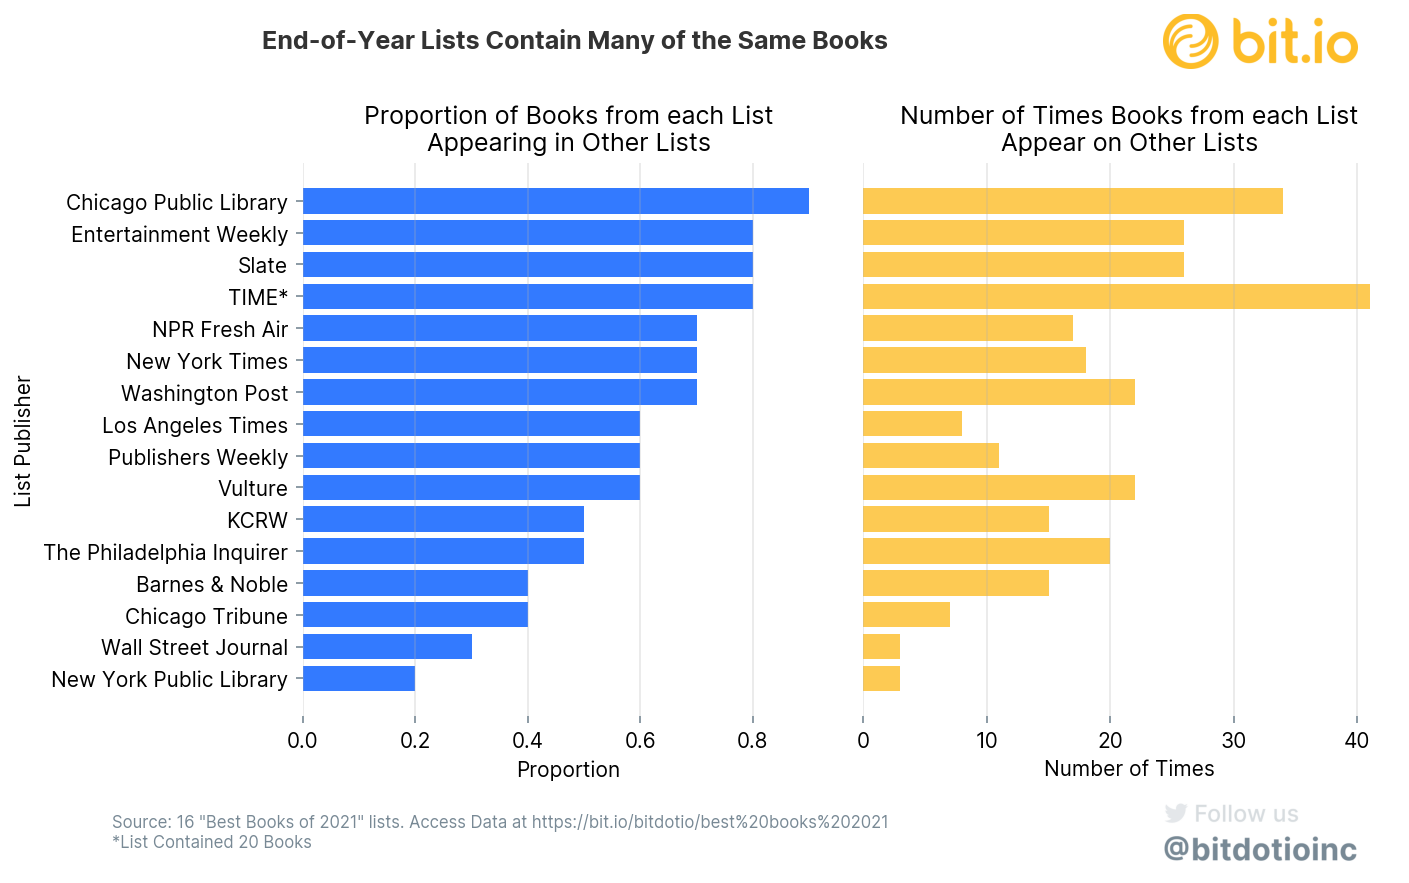

In [141]:
fig, ax = plt.subplots(1, 2, figsize=(10,6), dpi=150)

ax[0].barh(df_lists['source'], df_lists['prop'], color=BLUE, alpha=0.8)
ax[0].set_title('Proportion of Books from each List\nAppearing in Other Lists')
ax[0].set_xlabel('Proportion')
ax[0].set_ylabel('List Publisher')
ax[0].invert_yaxis()
# grid x
ax[0].grid(True, axis='x', alpha=0.3)

ax[1].barh(df_lists['source'], df_lists['times'], color=GOLD, alpha=0.8)
ax[1].set_title('Number of Times Books from each List\nAppear on Other Lists')
ax[1].invert_yaxis()
ax[1].set_yticks([])
ax[1].set_xlabel('Number of Times')
ax[1].grid(True, axis='x', alpha=0.3)


# Formatting
img = Image.open('/Users/danielliden/git/innerjoin/resources/logo.png')
img2 = Image.open('/Users/danielliden/git/innerjoin/resources/twitter.png')


for a in ax:
    for spine in ['top', 'right', 'left', 'bottom']:
        a.spines[spine].set_visible(False)
    a.tick_params(which='both', bottom=True, left=True, color=GREY)


fig.tight_layout(rect=[0.02,0.1,0.97,0.9]) 


fig.text(0.1, 0.05, 'Source: 16 "Best Books of 2021" lists. Access Data at https://bit.io/bitdotio/best%20books%202021\n*List Contained 20 Books', ha='left',
          fontdict={"family":"Inter", "size":8, "color":GREY})

fig.suptitle("End-of-Year Lists Contain Many of the Same Books", x=0.2, y=0.96,
             fontweight="bold", ha="left", fontdict={"family":"Inter", "size":8, "color":"black", "alpha":0.8})


# Fonts
mpl.rcParams['font.family'] = 'Inter'

# logos
logo = plt.axes([0.8,0.88, 0.13, 0.13], frameon=True) 
logo.imshow(img)
logo.axis('off')
logo.patch.set_facecolor("white")

twt = plt.axes([0.8,0.0, 0.13, 0.13], frameon=True) 
twt.imshow(img2)
twt.axis('off')
fig.patch.set_facecolor("white")
if not Path("./figures/").exists():
    Path("./figures/").mkdir()
plt.savefig("./figures/lists_figure_2.png")

plt.show()


In [167]:
names_i = []
props_i = []
counts_i = []

groups = df_individual.groupby('source')
for name, group in groups:
  #  print(name)
    others = df_media.loc[df_media['source'] != name]
    length = group.shape[0]
    titles = group['title']
    num = titles.isin(others['title'])
    n_times = (others['title'].isin(titles)).sum()
    counts_i.append(n_times)
    props_i.append(num.mean())
    names_i.append(name)

df_lists = pd.DataFrame({'source':names_i, 'prop':props_i, 'times':counts_i}).sort_values('prop', ascending=False)

df_individual

,source,title,author,link
0,Barack Obama,The Lincoln Highway,Amor Towles,https://twitter.com/BarackObama/status/1471168...
1,Barack Obama,"Invisible Child: Poverty, Survival & Hope in a...",Andrea Elliott,https://twitter.com/BarackObama/status/1471168...
2,Bill Gates,Project Hail Mary,Andy Weir,https://www.gatesnotes.com/About-Bill-Gates/Ho...
3,Barack Obama,These Precious Days,Ann Patchett,https://twitter.com/BarackObama/status/1471168...
4,Barack Obama,Cloud Cuckoo Land,Anthony Doerr,https://twitter.com/BarackObama/status/1471168...
5,Barack Obama,How the Word Is Passed: A Reckoning with the H...,Clint Smith,https://twitter.com/BarackObama/status/1471168...
6,Barack Obama,Harlem Shuffle,Colson Whitehead,https://twitter.com/BarackObama/status/1471168...
7,Barack Obama,The Final Revival of Opal & Nev,Dawnie Walton,https://twitter.com/BarackObama/status/1471168...
8,Barack Obama,The Love Songs of W.E.B. Du Bois,Honorée Fanonne Jeffers,https://twitter.com/BarackObama/status/1471168...
9,Bill Gates,A Thousand Brains: A New Theory of Intelligence,Jeff Hawkins,https://www.gatesnotes.com/About-Bill-Gates/Ho...


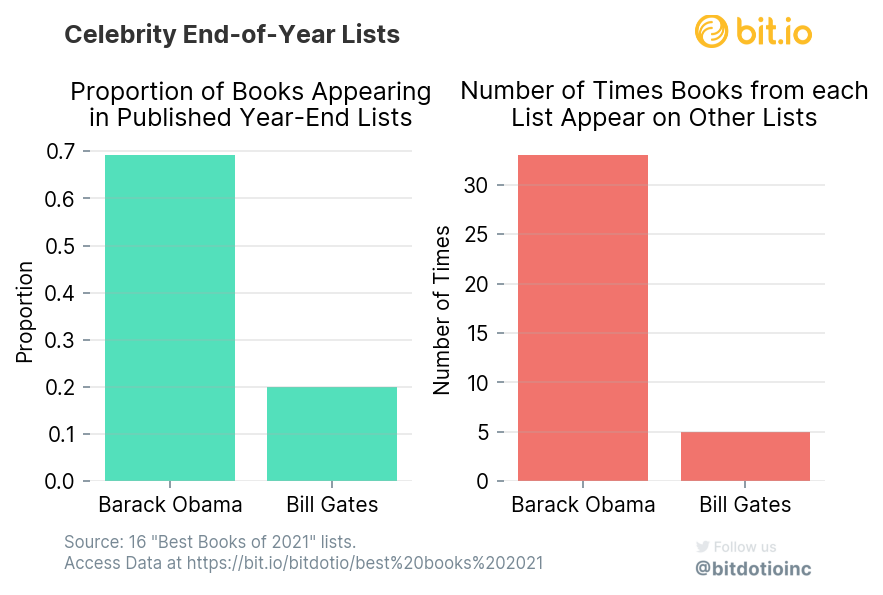

In [162]:
fig, ax = plt.subplots(1, 2, figsize=(6,4), dpi=150)

ax[0].bar(df_lists['source'], df_lists['prop'], color=GREEN, alpha=0.8)
ax[0].set_title('Proportion of Books Appearing\nin Published Year-End Lists')
ax[0].set_ylabel('Proportion')
# grid x
ax[0].grid(True, axis='y', alpha=0.3)

ax[1].bar(df_lists['source'], df_lists['times'], color=RED, alpha=0.8)
ax[1].set_title('Number of Times Books from each\nList Appear on Other Lists')
ax[1].set_ylabel('Number of Times')
ax[1].grid(True, axis='y', alpha=0.3)


# Formatting
img = Image.open('/Users/danielliden/git/innerjoin/resources/logo.png')
img2 = Image.open('/Users/danielliden/git/innerjoin/resources/twitter.png')


for a in ax:
    for spine in ['top', 'right', 'left', 'bottom']:
        a.spines[spine].set_visible(False)
    a.tick_params(which='both', bottom=True, left=True, color=GREY)


fig.tight_layout(rect=[0.02,0.1,0.97,0.9]) 


fig.text(0.1, 0.05, 'Source: 16 "Best Books of 2021" lists.\nAccess Data at https://bit.io/bitdotio/best%20books%202021', ha='left',
          fontdict={"family":"Inter", "size":8, "color":GREY})

fig.suptitle("Celebrity End-of-Year Lists", x=0.1, y=0.96,
             fontweight="bold", ha="left", fontdict={"family":"Inter", "size":8, "color":"black", "alpha":0.8})


# Fonts
mpl.rcParams['font.family'] = 'Inter'

# logos
logo = plt.axes([0.8,0.88, 0.13, 0.13], frameon=True) 
logo.imshow(img)
logo.axis('off')
logo.patch.set_facecolor("white")

twt = plt.axes([0.8,0.0, 0.13, 0.13], frameon=True) 
twt.imshow(img2)
twt.axis('off')
fig.patch.set_facecolor("white")
if not Path("./figures/").exists():
    Path("./figures/").mkdir()
plt.savefig("./figures/lists_figure_3.png")

plt.show()

/Users/danielliden/git/innerjoin/2021_book_lists/env/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/var/folders/kx/yhv2f4ds2xl41vhv6h8py3q80000gn/T/ipykernel_46971/3970611543.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_yticks([])


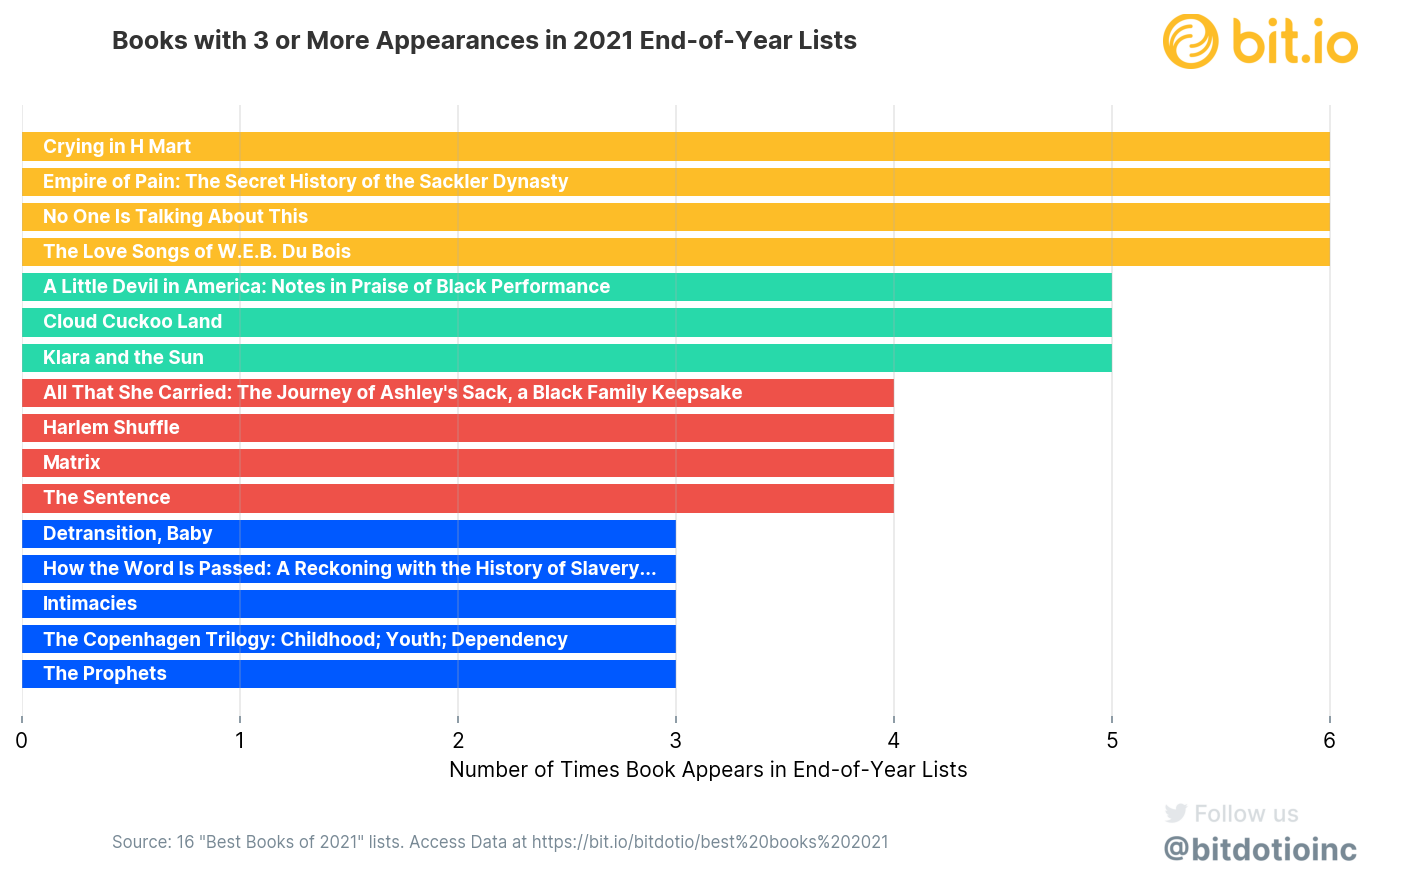

In [99]:
df_rank3 = df_rank.loc[df_rank['count']>=3, :]
df_rank3.iloc[12,0] = "How the Word Is Passed: A Reckoning with the History of Slavery..."

# make horizontal bar plot from df_rank3 count column
#reverse order of df_rank3
my_colors = [GOLD, GOLD, GOLD, GOLD, GREEN, GREEN, GREEN, RED, RED, RED, RED, BLUE, BLUE, BLUE, BLUE, BLUE]
#df_rank3 = df_rank3.sort_values('count', ascending=True)
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
barlist = ax.barh(df_rank3['title'].values, df_rank3['count'].values, color=my_colors)
ax.invert_yaxis()
ax.set_yticks([])
ax.set_xlabel('Number of Times Book Appears in End-of-Year Lists')
# vertical grid
ax.xaxis.grid(True, linestyle='-', which='major', alpha=0.3)

# Formatting
img = Image.open('/Users/danielliden/git/innerjoin/resources/logo.png')
img2 = Image.open('/Users/danielliden/git/innerjoin/resources/twitter.png')


for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.tick_params(which='both', bottom=True, left=True, color=GREY)


fig.tight_layout(rect=[0.02,0.1,0.97,0.9]) 

# add labels overlapping bars
for i, bar in enumerate(barlist):
    width = bar.get_width()
    ax.text(0.1, i, df_rank3.loc[i,'title'], color="white", ha='left', va='center', fontweight="bold", fontsize=9
            #path_effects=[path_effects.withStroke(linewidth=0.5, foreground='white')])
    )

fig.text(0.1, 0.05, r'Source: 16 "Best Books of 2021" lists. Access Data at https://bit.io/bitdotio/best%20books%202021', ha='left',
          fontdict={"family":"Inter", "size":8, "color":GREY})

fig.suptitle("Books with 3 or More Appearances in 2021 End-of-Year Lists", x=0.1, y=0.96,
             fontweight="bold", ha="left", fontdict={"family":"Inter", "size":8, "color":"black", "alpha":0.8})


# Fonts
mpl.rcParams['font.family'] = 'Inter'

# logos
logo = plt.axes([0.8,0.88, 0.13, 0.13], frameon=True) 
logo.imshow(img)
logo.axis('off')
logo.patch.set_facecolor("white")

twt = plt.axes([0.8,0.0, 0.13, 0.13], frameon=True) 
twt.imshow(img2)
twt.axis('off')
fig.patch.set_facecolor("white")
if not Path("./figures/").exists():
    Path("./figures/").mkdir()
plt.savefig("./figures/books_figure_1.png")

plt.show()


